Давыдов ПИм-231 8 лаба ммо

На основе рассмотренного на занятии Colab-ноутбука по распознаванию предметов одежды решите задачу распознавания рукописных цифр.

Используйте для этого известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр размером 28x28.

В прилагающемся Colab-ноутбуке всюду замените fashion_mnist на mnist. При построении конфигурации полносвязной нейронной сети поэкспериментируйте с различными функции активации, количеством скрытых слоев и количеством нейронов на них.

Приведите графики долей правильных ответов на обучающем множестве и валидационном. Определите оптимальное количество эпох для обучения для каждой из используемых конфигураций нейронной сети.

Получите оценки качества классификаторов на тестовом множестве. Какая конфигурация из используемых лучше?

Для тестирования результатов на реальных данных можете использовать приложенный архив с изображениями рукописных цифр, а также подготовьте свои картинки (например, в Paint), при этом изображение сделайте близким к квадратному и размер задайте небольшой, в то же время толщина кисти, которой Вы будете писать цифры, должна быть существенной.

Постарайтесь понять, с какими цифрами построенный классификатор испытывает наибольшие сложности.

Решите задачу классификации методами, рассмотренными в прошлом семестре.

 Сравните с работой классификатора на основе нейронной сети по времени, по точности.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


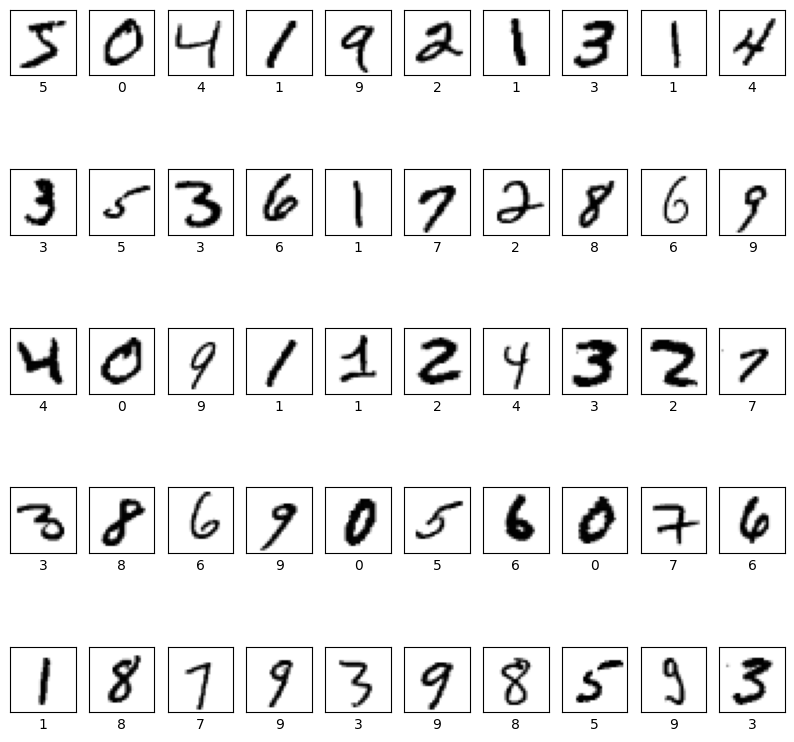

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train / 255
X_test = X_test / 255

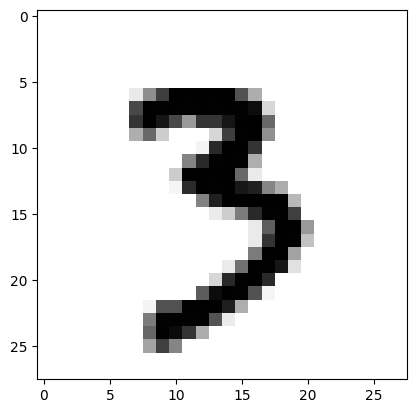

In [ ]:
plt.imshow(X_test[30].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
print(y_train[30])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="relu")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=400, activation="relu")) # 1 скрытый слой
model.add(Dense(400, input_dim=400, activation="relu")) # 2 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 638810 (2.44 MB)
Trainable params: 638810 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=200,
                    epochs=42,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1)

Epoch 1/42
240/240 [==============================] - 11s 40ms/step - loss: 1.7314 - accuracy: 0.6037 - val_loss: 0.9968 - val_accuracy: 0.8056
Epoch 2/42
240/240 [==============================] - 8s 34ms/step - loss: 0.7159 - accuracy: 0.8376 - val_loss: 0.5051 - val_accuracy: 0.8720
Epoch 3/42
240/240 [==============================] - 5s 22ms/step - loss: 0.4707 - accuracy: 0.8764 - val_loss: 0.3909 - val_accuracy: 0.8938
Epoch 4/42
240/240 [==============================] - 4s 17ms/step - loss: 0.3911 - accuracy: 0.8926 - val_loss: 0.3426 - val_accuracy: 0.9053
Epoch 5/42
240/240 [==============================] - 5s 22ms/step - loss: 0.3498 - accuracy: 0.9024 - val_loss: 0.3145 - val_accuracy: 0.9118
Epoch 6/42
240/240 [==============================] - 8s 33ms/step - loss: 0.3223 - accuracy: 0.9086 - val_loss: 0.2938 - val_accuracy: 0.9137
Epoch 7/42
240/240 [==============================] - 9s 36ms/step - loss: 0.3018 - accuracy: 0.9146 - val_loss: 0.2774 - val_accuracy: 0.919

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9634
Доля верных ответов на тестовых данных, в процентах: 96.34


Хорошая точность 96%

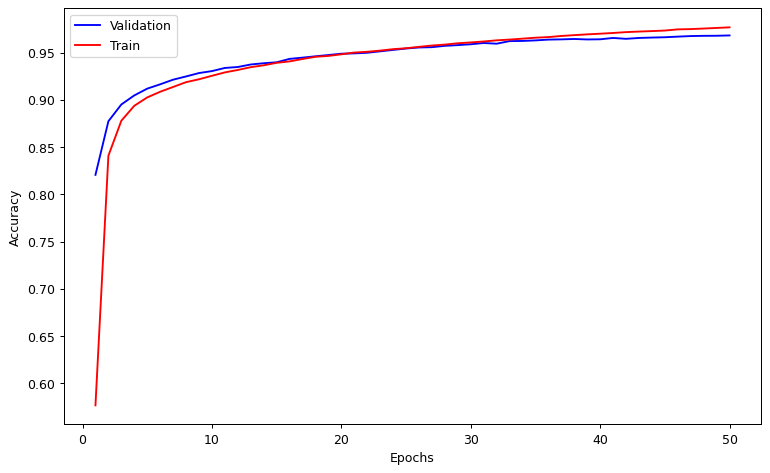

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Видно, что оптимальное количество эпох между 30 и 40

In [ ]:
import numpy as np
import plotly.graph_objects as go

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(epochs), y=val_acc_values, mode='lines', name='Validation', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=list(epochs), y=acc_values, mode='lines', name='Train', line=dict(color='red')))

fig.update_layout(title='Accuracy Over Epochs',
                   xaxis_title='Epochs',
                   yaxis_title='Accuracy',
                   legend=dict(x=0.7, y=1),
                   template='plotly_white')

fig.show()


Построив интерактивный график, я увидел, что самая высокая точность на 41 эпохе (вроде бы)

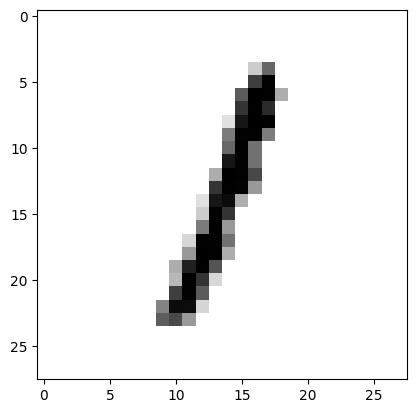

In [ ]:
n_test = 228
plt.imshow(X_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
x = X_test[n_test]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])
print("Нейронка думает что это число:", prediction)

1/1 [==============================] - 0s 111ms/step
Нейронка думает что это число: 1


Тестируем собственные картинки. Взял те, которые делал в прошлом семестре.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 1045 байт загружен(ы)
Файл(ы) "1.jpg" размером 1035 байт загружен(ы)
Файл(ы) "2.jpg" размером 1157 байт загружен(ы)
Файл(ы) "3.jpg" размером 1126 байт загружен(ы)
Файл(ы) "4.jpg" размером 1059 байт загружен(ы)
Файл(ы) "5.jpg" размером 1037 байт загружен(ы)
Файл(ы) "6.jpg" размером 1063 байт загружен(ы)
Файл(ы) "7.jpg" размером 1102 байт загружен(ы)
Файл(ы) "8.jpg" размером 1225 байт загружен(ы)
Файл(ы) "9.jpg" размером 1176 байт загружен(ы)


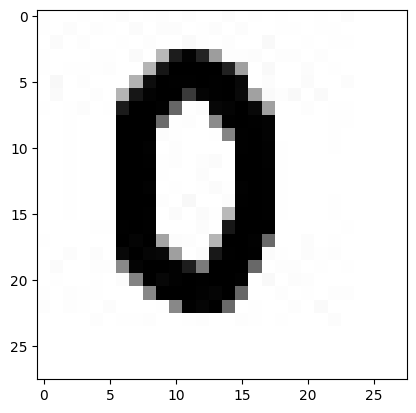

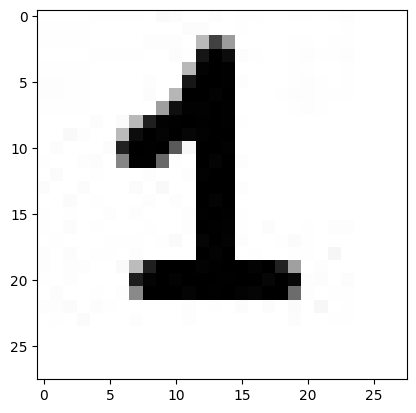

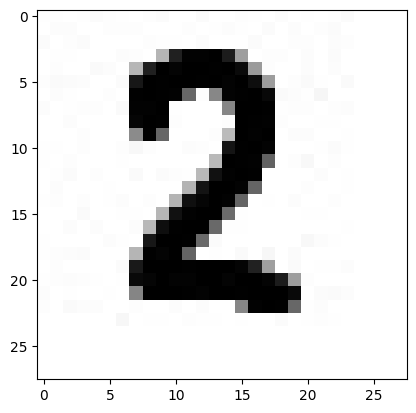

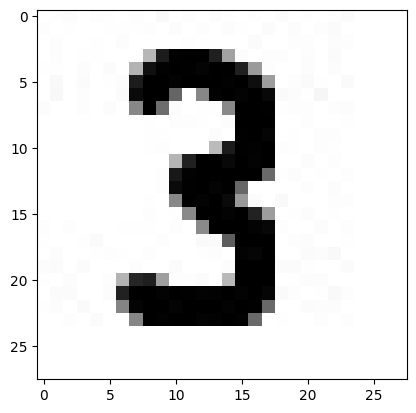

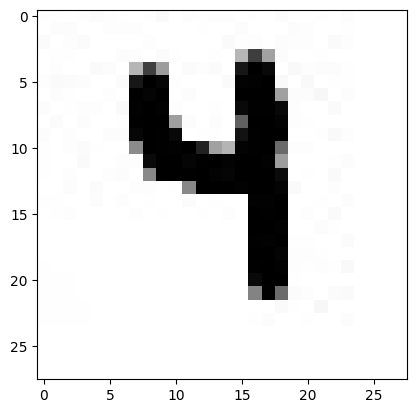

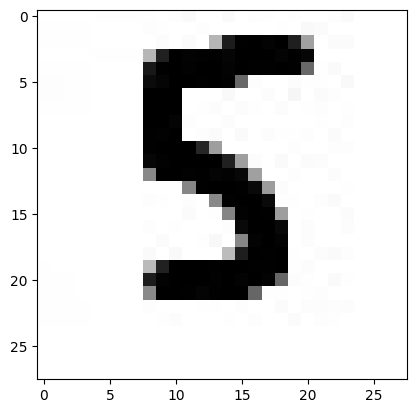

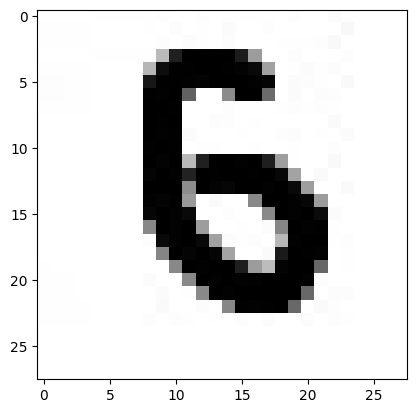

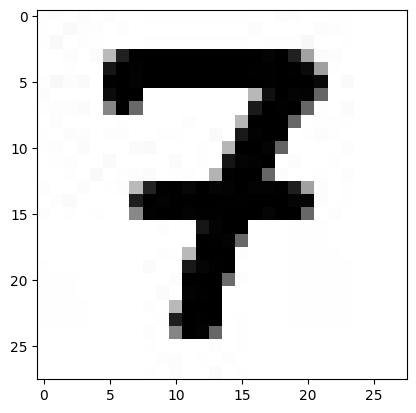

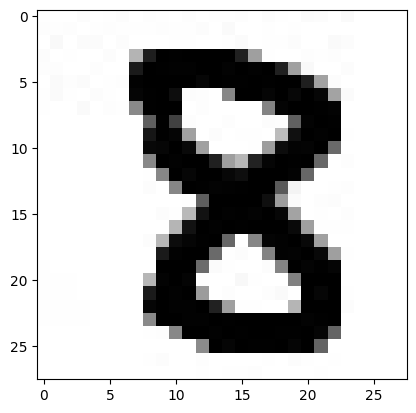

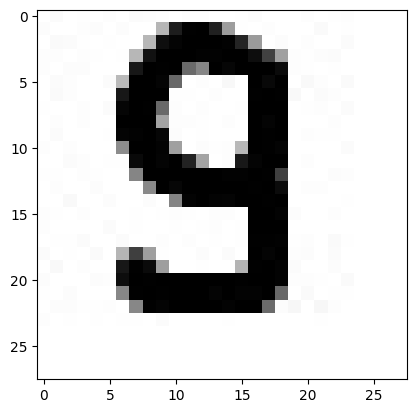

In [ ]:
for fn in uploaded.keys():
  img = image.load_img(fn, target_size=(28, 28), color_mode = "grayscale")
  plt.imshow(img.convert('RGBA'))
  plt.show()

In [ ]:
def classifier(index, uploaded, model):

  uploaded_files = list(uploaded.keys())
  selected_file = uploaded_files[index] # выбор картинки по индексу, конвертация
  selected_img = image.load_img(selected_file, target_size=(28, 28), color_mode="grayscale")
  plt.imshow(selected_img.convert('RGBA'))
  plt.show() # показываем картинку

  x_selected = image.img_to_array(selected_img)
  x_selected = x_selected.reshape(1, 784)
  x_selected = 255 - x_selected
  x_selected /= 255 #собираем обратно в 1-мерный массив и даём его в метод

  prediction = model.predict(x_selected)
  prediction = np.argmax(prediction[0])
  print("Модель думает, что это число:", prediction)

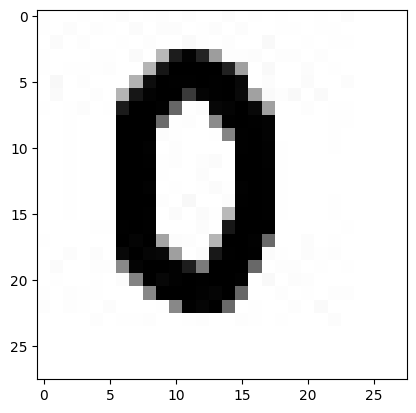

1/1 [==============================] - 0s 22ms/step
Модель думает, что это число: 2


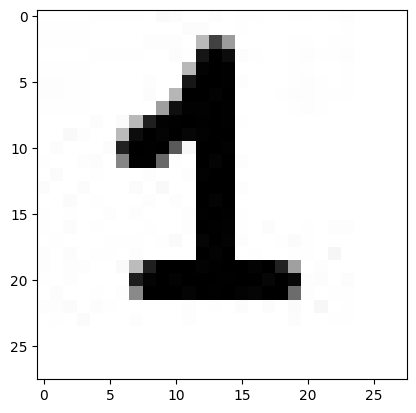

1/1 [==============================] - 0s 21ms/step
Модель думает, что это число: 1


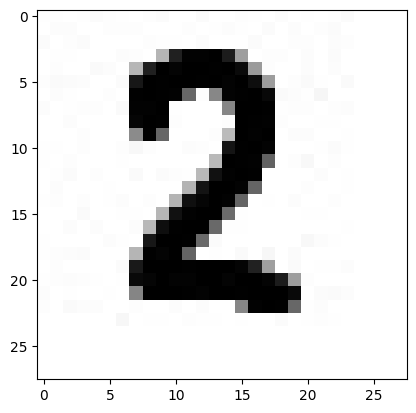

1/1 [==============================] - 0s 22ms/step
Модель думает, что это число: 2


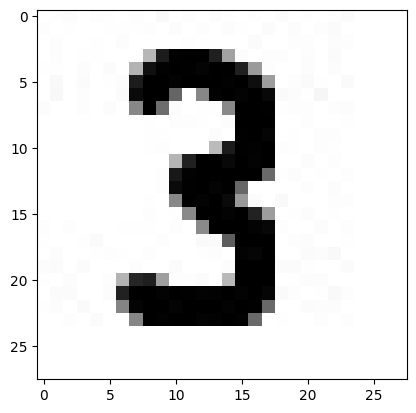

1/1 [==============================] - 0s 22ms/step
Модель думает, что это число: 3


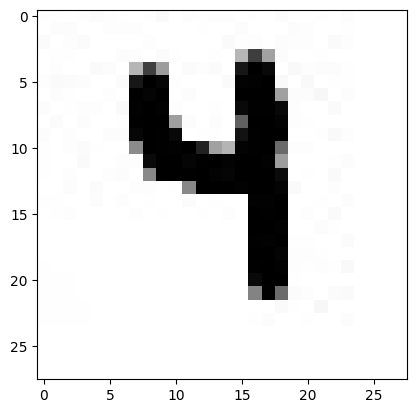

1/1 [==============================] - 0s 20ms/step
Модель думает, что это число: 9


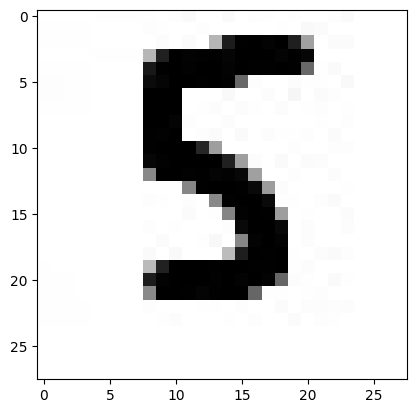

1/1 [==============================] - 0s 23ms/step
Модель думает, что это число: 6


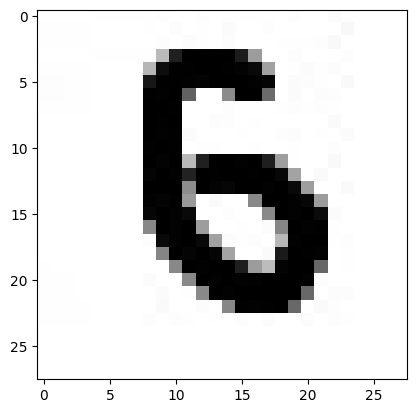

1/1 [==============================] - 0s 20ms/step
Модель думает, что это число: 6


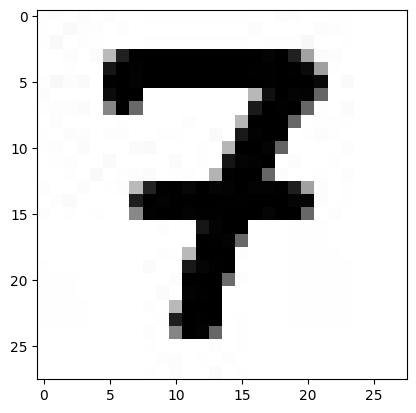

1/1 [==============================] - 0s 21ms/step
Модель думает, что это число: 3


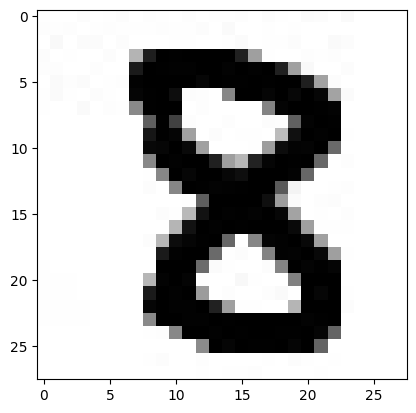

1/1 [==============================] - 0s 21ms/step
Модель думает, что это число: 8


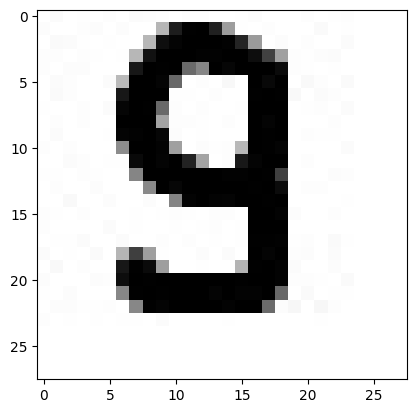

1/1 [==============================] - 0s 20ms/step
Модель думает, что это число: 3


In [ ]:
for index in range(0, 10):
  classifier(index, uploaded, model)

В целом результат не очень, наверное я использовал слишком толстую кисть, когда рисовал свои цифры.

Что касается решения задачи классификации методами, рассмотренными в прошлом семестре, то вот: https://colab.research.google.com/drive/1gATbOLgh-8csrCLfvE4fj-Tab-YjtZhO?usp=sharing

Лень делать Ctrl+C и Ctrl+V =)